In [4]:
import os
import glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# Read Metrics data

In [5]:
ten_min_tfm= pd.read_csv(r'C:\Users\sidha\Desktop\Final Dissertatoin\Metrics 12-12\10min_metrics.csv')
hour_tfm= pd.read_csv(r'C:\Users\sidha\Desktop\Final Dissertatoin\Metrics 12-12\hourly_metrics.csv')
three_hour_tfm= pd.read_csv(r'C:\Users\sidha\Desktop\Final Dissertatoin\Metrics 12-12\3hourly_metrics.csv')
ten_min_xg= pd.read_csv(r'C:\Users\sidha\Desktop\Final Dissertatoin\Metrics 12-12\metrics_xgboost_10_min.csv')
hour_xg= pd.read_csv(r'C:\Users\sidha\Desktop\Final Dissertatoin\Metrics 12-12\metrics_xgboost_hour.csv')
three_hour_xg= pd.read_csv(r'C:\Users\sidha\Desktop\Final Dissertatoin\Metrics 12-12\metrics_xgboost_three_hour.csv')
long_horizon_tfm= pd.read_csv(r'C:\Users\sidha\Desktop\Final Dissertatoin\Metrics 12-12\metrics_10min_93110.csv')

In [6]:
# # Combine all datasets (Hourly, 10-Min, 3-Hour data)
# combined_data = pd.concat([
#     long_horizon_tfm[["Horizon Length", "MAE"]],
#     hour_tfm_station[["Horizon Length", "MAE", "Source", "Model"]].rename(columns={"Horizon Length": "Horizon Length (Hours)"}),
#     hour_xg_station[["Output Chunk Length", "MAE", "Model"]].rename(columns={"Output Chunk Length": "Horizon Length (Hours)"}),
#     three_hour_tfm_station[["Horizon Length", "MAE", "Source"]],
#     three_hour_xg_station[["Output Chunk Length", "MAE"]].rename(columns={"Output Chunk Length": "Horizon Length (Hours)"}),
# ], ignore_index=True)

# Plotting MAE for all three frequency with horizon of 1 - 36 hours

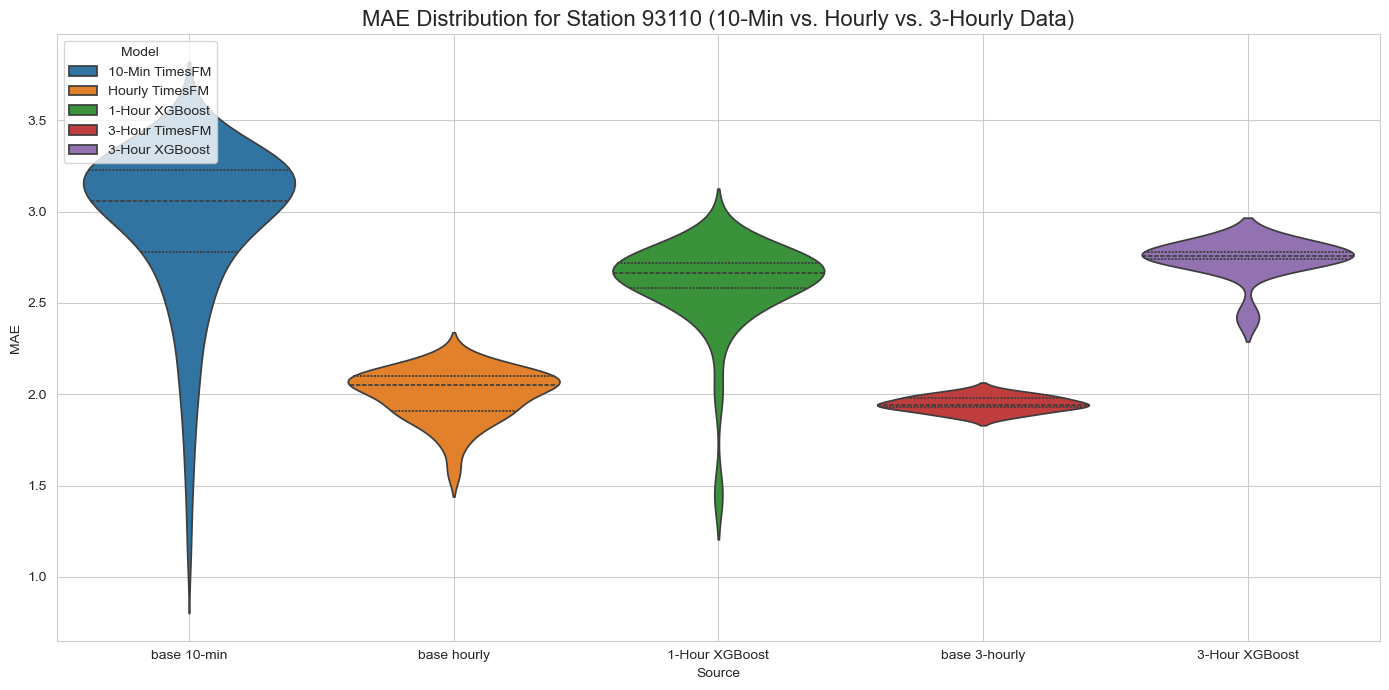

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the station ID for comparison
station_id = 93110

# Prepare 10-min TimesFM data for the station (resample to hourly frequency)
long_horizon_tfm_station = long_horizon_tfm[long_horizon_tfm["Station ID"] == station_id].copy()
long_horizon_tfm_station["Horizon Length (Hours)"] = long_horizon_tfm_station["Horizon Length"] / 6  # Convert to hours
long_horizon_tfm_station["Source"] = "base 10-min"
long_horizon_tfm_station["Model"] = "10-Min TimesFM"

# Prepare hourly TimesFM data for the station (only base mode)
hour_tfm_station = hour_tfm[hour_tfm["Station ID"] == station_id].copy()
hour_tfm_station = hour_tfm_station[hour_tfm_station["Source"] == 'base']  # Filter only base mode
hour_tfm_station["Source"] = "base hourly"  # Update source to differentiate hourly data
hour_tfm_station["Model"] = "Hourly TimesFM"

# Prepare hourly XGBoost data for the station
hour_xg_station = hour_xg[hour_xg["Station ID"] == station_id].copy()
hour_xg_station = hour_xg_station[["MAE","Output Chunk Length"]].assign(Source="1-Hour XGBoost", Model="1-Hour XGBoost")
hour_xg_station["Horizon Length (Hours)"] = hour_xg_station["Output Chunk Length"]

# Prepare 3-hourly TimesFM data for the station (adjust for 3-hour frequency)
three_hour_tfm_station = three_hour_tfm[three_hour_tfm["Station ID"] == station_id].copy()
three_hour_tfm_station = three_hour_tfm_station[three_hour_tfm_station["Source"] == 'base'][["MAE", "Source", "Horizon Length"]]  # Correct filtering
three_hour_tfm_station["Source"] = "base 3-hourly"  # Update source to differentiate 3-hourly data
three_hour_tfm_station["Model"] = "3-Hour TimesFM"  # Add a model label for TimesFM
three_hour_tfm_station["Horizon Length (Hours)"] = three_hour_tfm_station["Horizon Length"] * 3  # Adjust for 3-hour intervals

# Prepare XGBoost data for the 3-hour frequency (adjust for 3-hour frequency)
three_hour_xg_station = three_hour_xg[three_hour_xg["Station ID"] == station_id].copy()
three_hour_xg_station = three_hour_xg_station[["MAE","Output Chunk Length"]].assign(Source="3-Hour XGBoost", Model="3-Hour XGBoost")
three_hour_xg_station["Horizon Length (Hours)"] = three_hour_xg_station["Output Chunk Length"] * 3  # Adjust for 3-hour intervals

# # Combine all datasets (Hourly, 10-Min, 3-Hour data)
combined_data = pd.concat([
    long_horizon_tfm_station[["Horizon Length (Hours)", "MAE", "Source", "Model"]],
    hour_tfm_station[["Horizon Length", "MAE", "Source", "Model"]].rename(columns={"Horizon Length": "Horizon Length (Hours)"}),
    hour_xg_station[["Output Chunk Length", "MAE", "Source", "Model"]].rename(columns={"Output Chunk Length": "Horizon Length (Hours)"}),
    three_hour_tfm_station[["Horizon Length (Hours)", "MAE", "Source", "Model"]],
    three_hour_xg_station[["Horizon Length (Hours)", "MAE", "Source", "Model"]]
], ignore_index=True)

# Create the violin plot with updated sources for hourly and 3-hourly
plt.figure(figsize=(14, 7))
sns.violinplot(
    x="Source", 
    y="MAE", 
    hue="Model", 
    data=combined_data, 
    split=False, 
    inner="quartile"
)

# Customize the plot
plt.title(f"MAE Distribution for Station {station_id} (10-Min vs. Hourly vs. 3-Hourly Data)", fontsize=16)
plt.xlabel("Source")
plt.ylabel("MAE")
plt.legend(title="Model", loc="upper left")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


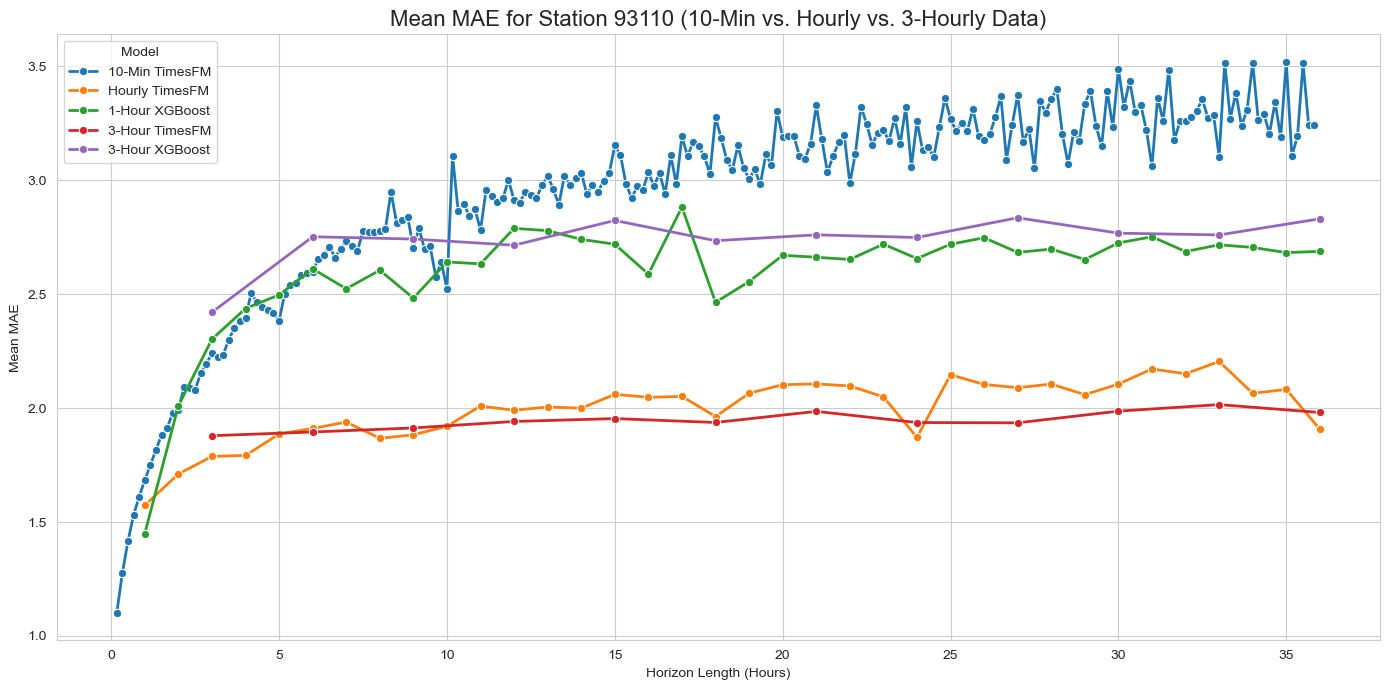

In [8]:
# Create the line plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=combined_data,
    x="Horizon Length (Hours)", 
    y="MAE", 
    hue="Model", 
    marker="o", 
    linewidth=2
)

# Customize the plot
plt.title(f"Mean MAE for Station {station_id} (10-Min vs. Hourly vs. 3-Hourly Data)", fontsize=16)
plt.xlabel("Horizon Length (Hours)")
plt.ylabel("Mean MAE")
plt.legend(title="Model", loc="upper left")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# Plotting metrics for 10 min data

## Violin plots to compare different methods in tfm and xg boost

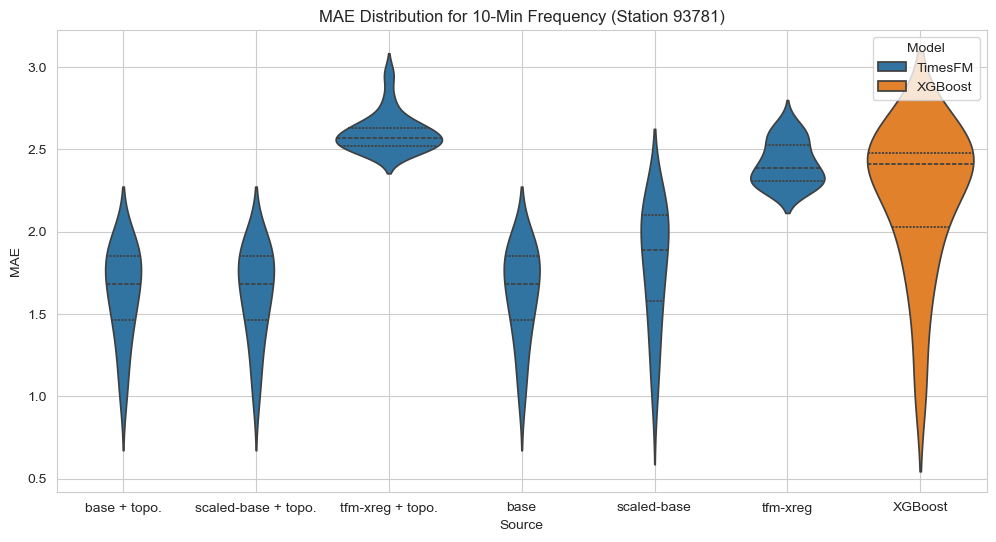

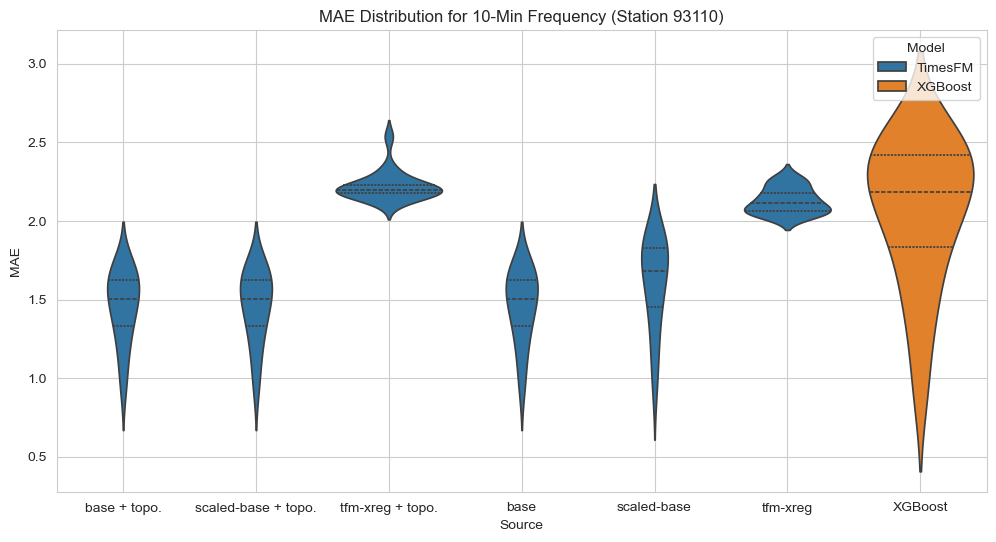

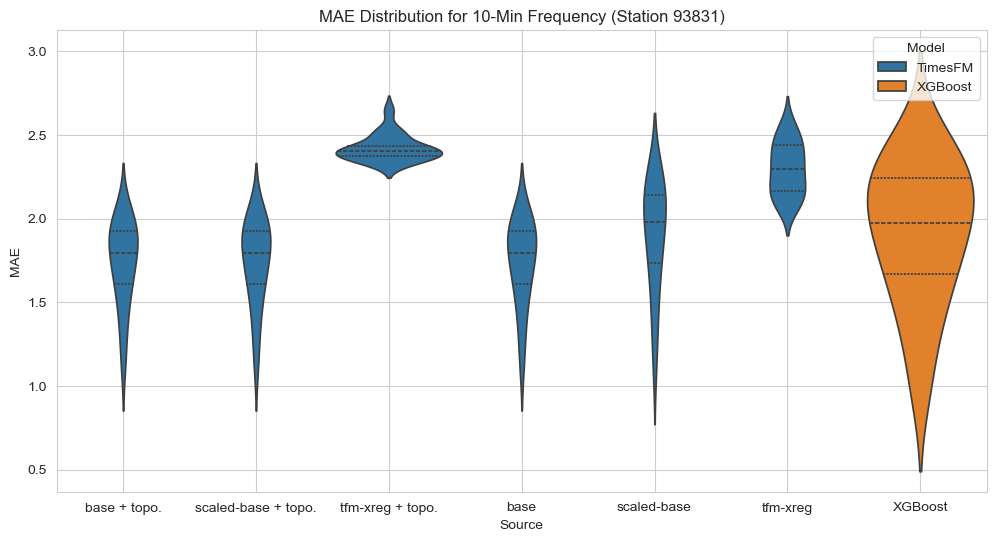

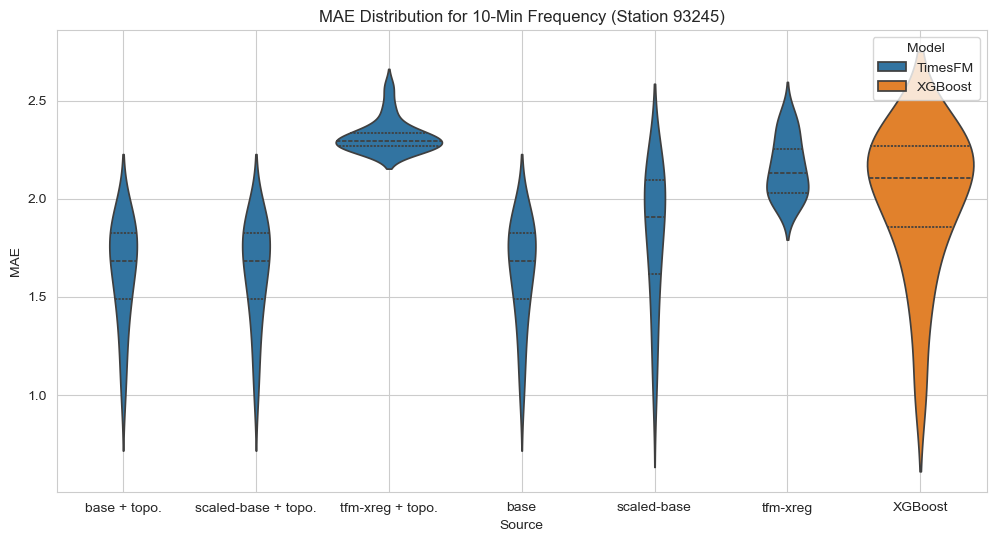

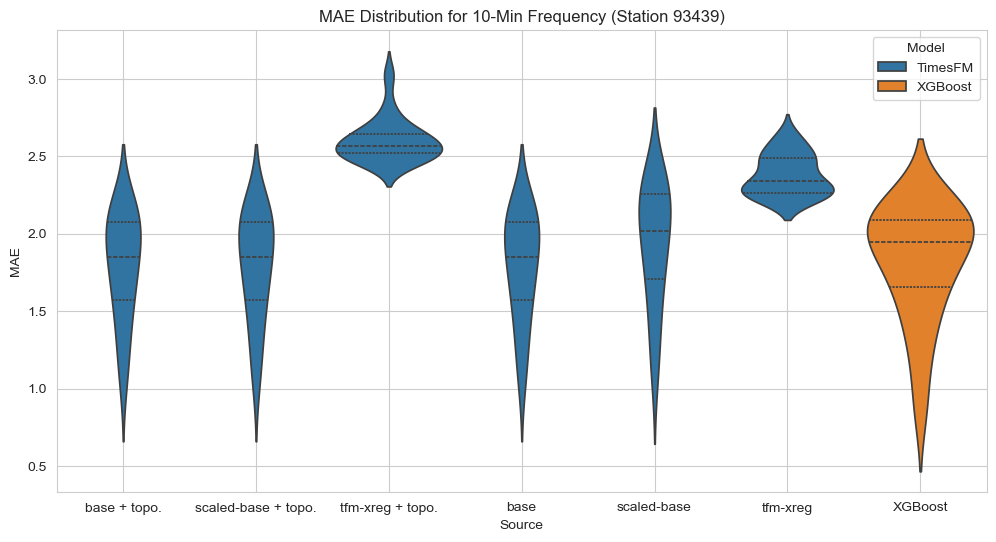

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# Define the station IDs for comparison
station_ids = {93110, 93831, 93781, 93439, 93245}

# Loop through each station ID
for station_id in station_ids:
    # Filter TimesFM data for the specific station
    ten_min_tfm_station = ten_min_tfm[ten_min_tfm["Station ID"] == station_id]
    ten_min_tfm_station = ten_min_tfm_station[["MAE", "Source"]]  # Only use the relevant columns
    ten_min_tfm_station["Model"] = "TimesFM"  # Add a model label for TimesFM

    # Prepare XGBoost data for the violin plot
    ten_min_xg_station = ten_min_xg[ten_min_xg["Station ID"] == station_id]
    ten_min_xg_station = ten_min_xg_station[["MAE"]].assign(Source="XGBoost", Model="XGBoost")

    # Combine TimesFM and XGBoost data
    combined_data = pd.concat([ten_min_tfm_station, ten_min_xg_station], ignore_index=True)

    # Create the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Source", y="MAE", hue="Model", data=combined_data, split=False, inner="quartile")

    # Customize the plot
    plt.title(f"MAE Distribution for 10-Min Frequency (Station {station_id})")
    plt.xlabel("Source")
    plt.ylabel("MAE")
    plt.legend(title="Model")
    plt.grid(True)
    plt.show()


## Plot to compare mae vs output chunk length

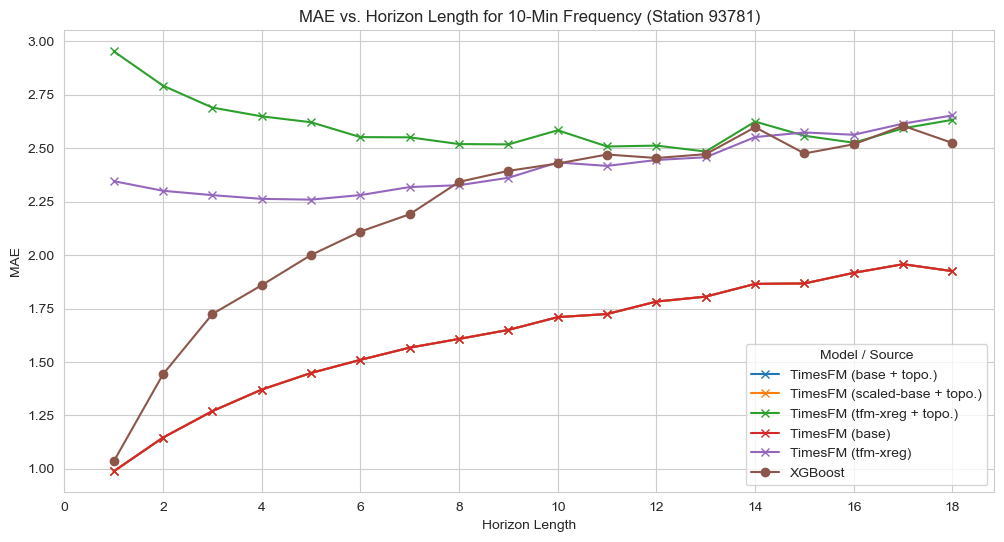

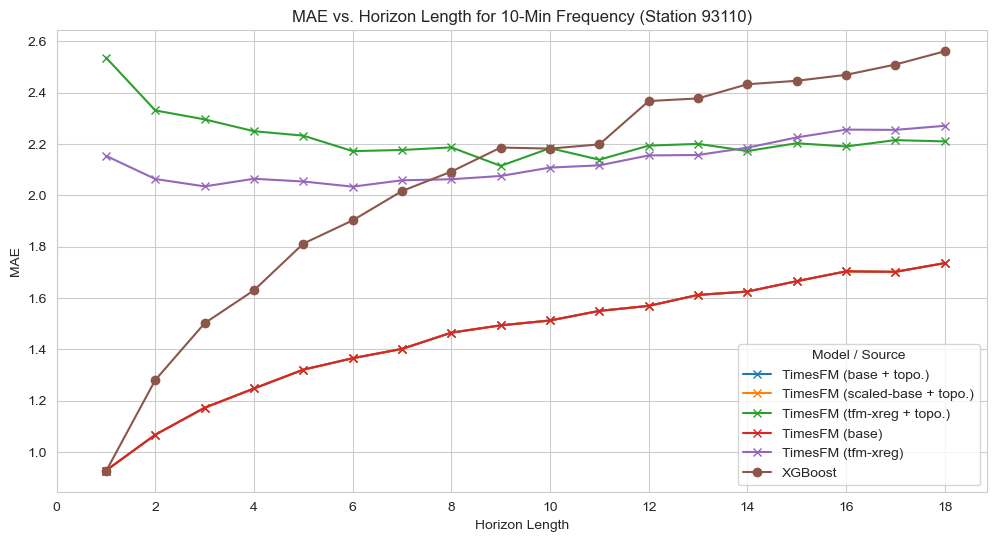

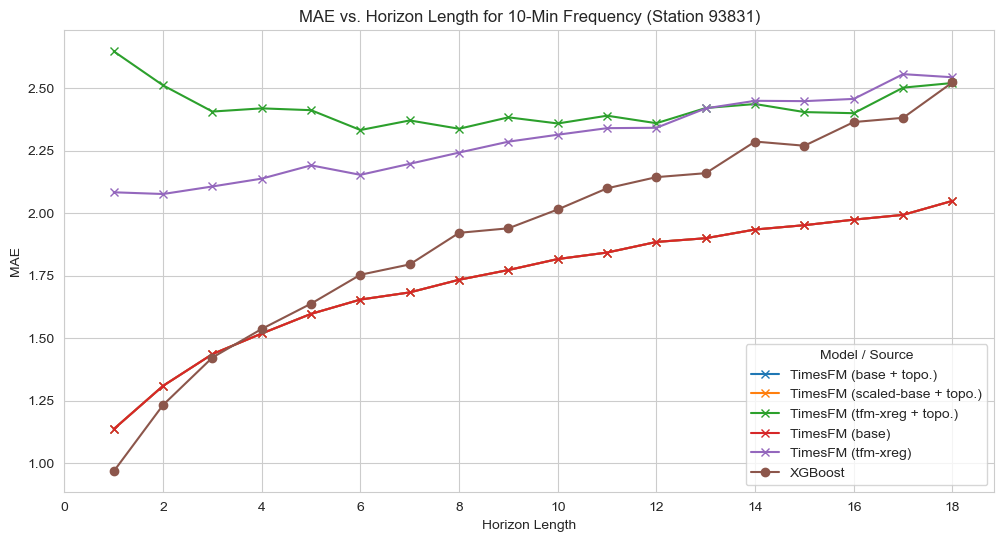

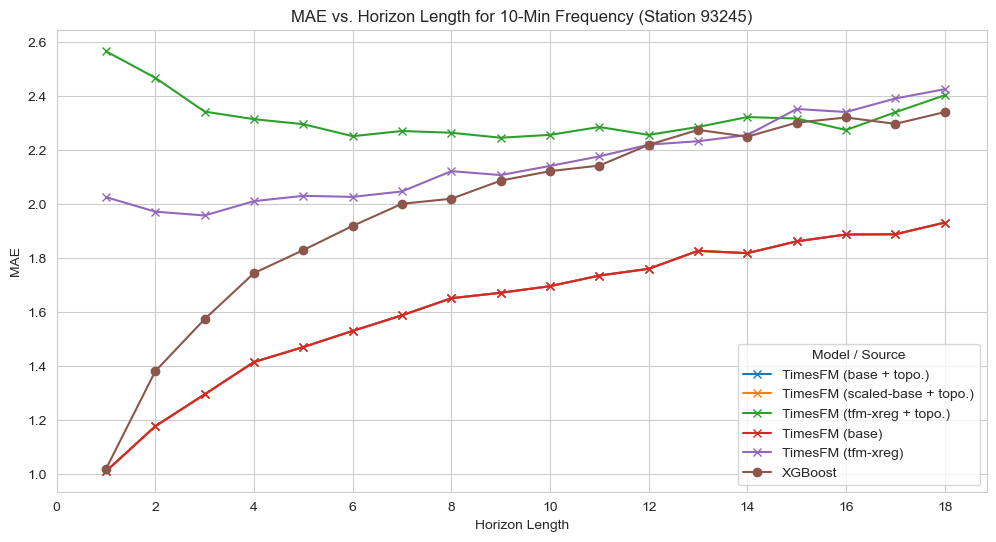

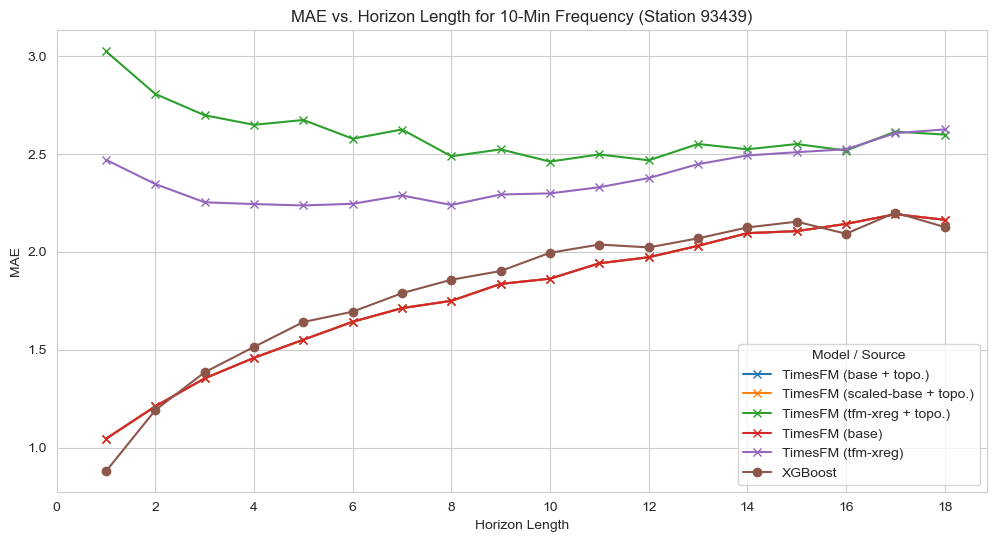

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the station IDs for comparison
station_ids = {93110, 93831, 93781, 93439, 93245}

# Define sources to exclude from TimesFM
sources_to_exclude = ["base + topography", "scaled-base + topography", "tfm-xreg + topography", "scaled-base"]

# Loop through each station ID
for station_id in station_ids:
    plt.figure(figsize=(12, 6))

    # Prepare TimesFM data for plotting
    ten_min_tfm_station = ten_min_tfm[ten_min_tfm["Station ID"] == station_id].copy()

    # Exclude specific sources if specified
    if sources_to_exclude:
        ten_min_tfm_station = ten_min_tfm_station[~ten_min_tfm_station["Source"].isin(sources_to_exclude)]

    # Plot MAE values for each source in TimesFM for the current station
    for source in ten_min_tfm_station["Source"].unique():
        source_data = ten_min_tfm_station[ten_min_tfm_station["Source"] == source]

        # Plot MAE values for the source
        plt.plot(
            source_data["Horizon Length"],
            source_data["MAE"],
            label=f"TimesFM ({source})",
            marker="x"
        )

    # Prepare XGBoost data for plotting
    ten_min_xg_station = ten_min_xg[ten_min_xg["Station ID"] == station_id].copy()

    # Plot MAE values for XGBoost
    plt.plot(
        ten_min_xg_station["Output Chunk Length"],
        ten_min_xg_station["MAE"],
        label="XGBoost",
        marker="o"
    )
    
    # Customize the plot
    plt.title(f"MAE vs. Horizon Length for 10-Min Frequency (Station {station_id})")
    plt.xlabel("Horizon Length")
    plt.ylabel("MAE")
    plt.legend(title="Model / Source")
    plt.grid(True)
    plt.xticks(ticks=np.arange(0, ten_min_tfm_station["Horizon Length"].max() + 1, 2))  # Adjust x-axis ticks dynamically
    plt.show()


# Plotting metrics for 1 hour data

## Violin plots to compare different methods in tfm and xg boost

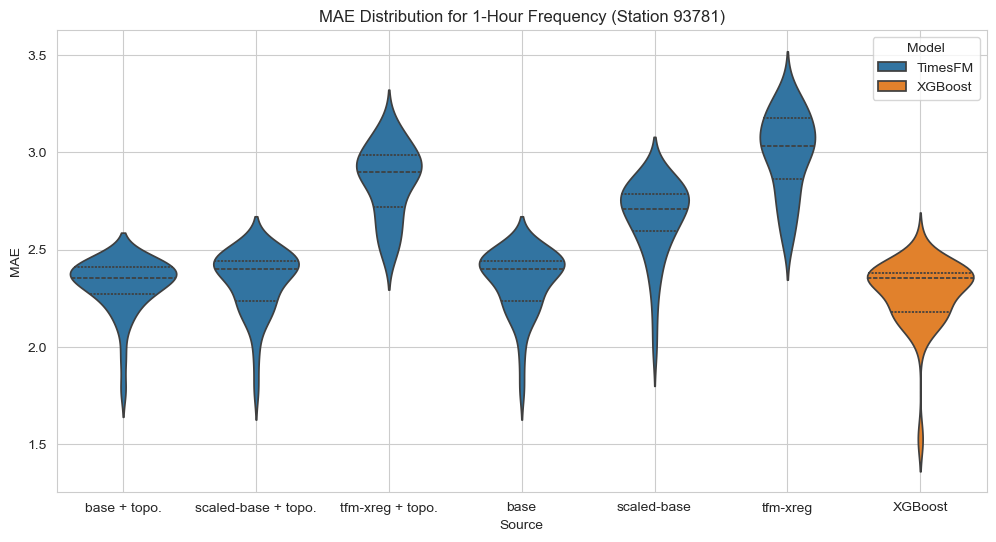

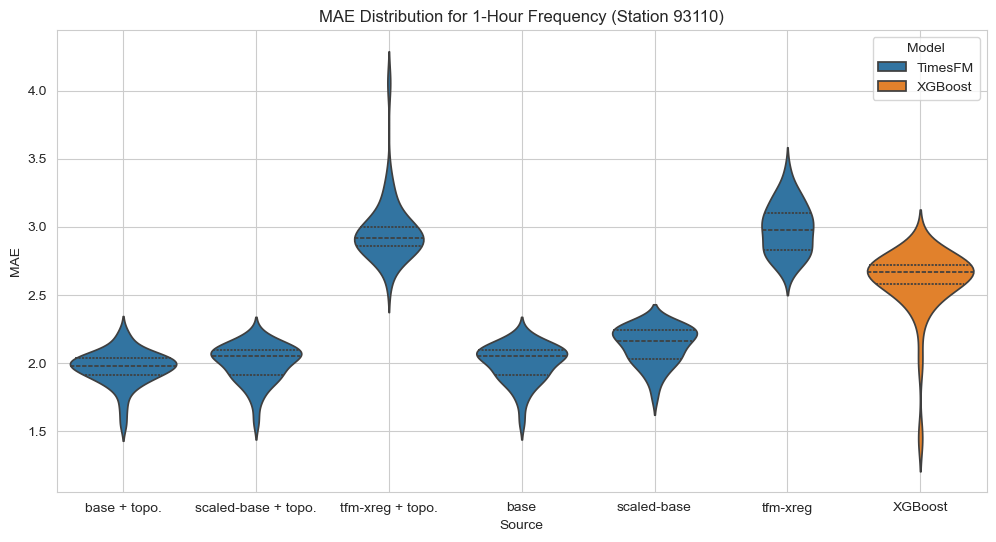

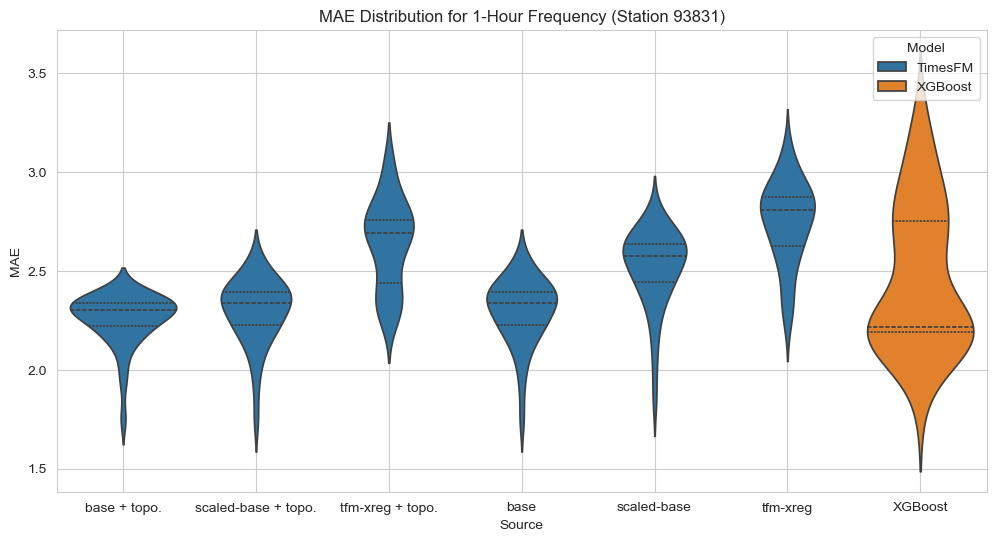

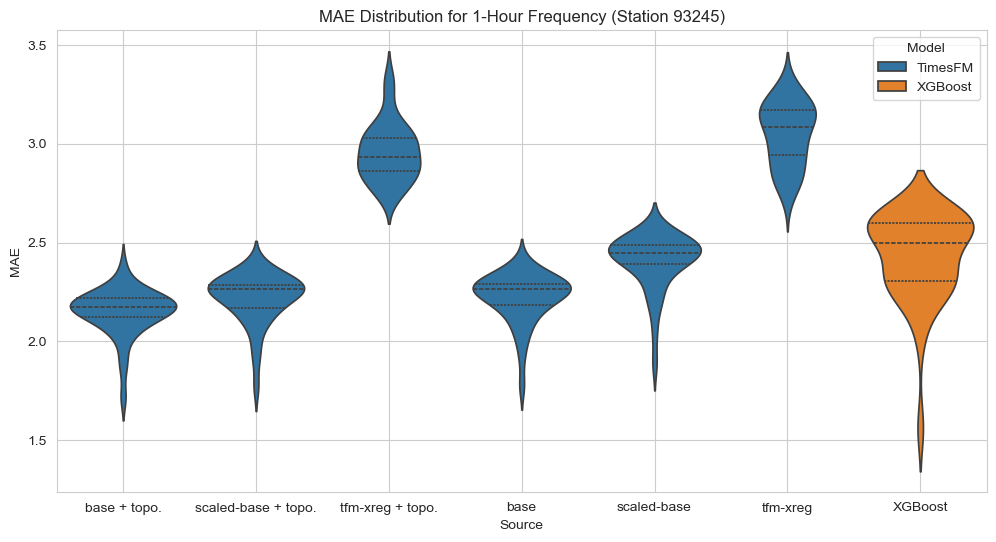

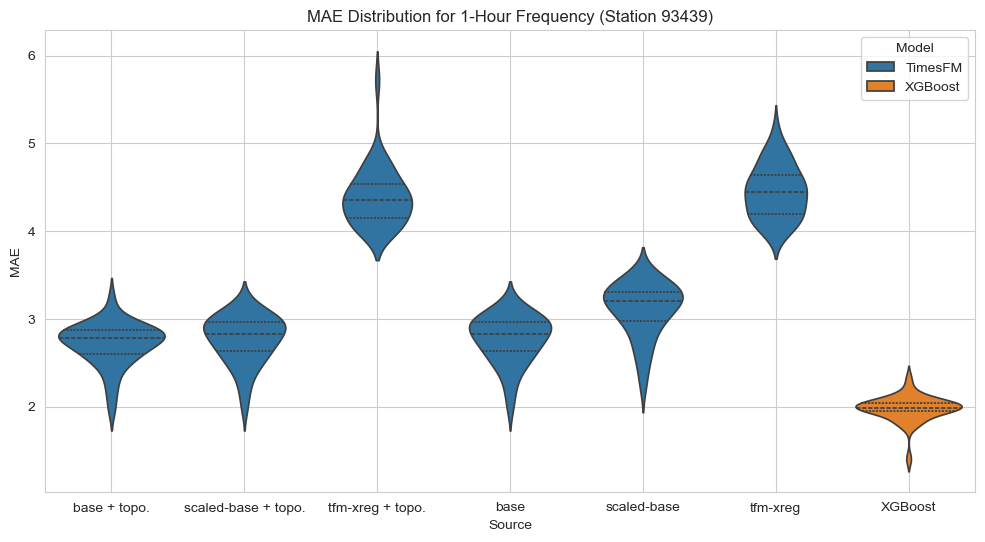

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# Define the station IDs for comparison
station_ids = {93110, 93831, 93781, 93439, 93245}

# Loop through each station ID
for station_id in station_ids:
    # Filter TimesFM data for the specific station
    hour_tfm_station = hour_tfm[hour_tfm["Station ID"] == station_id]
    hour_tfm_station = hour_tfm_station[["MAE", "Source"]]  # Only use the relevant columns
    hour_tfm_station["Model"] = "TimesFM"  # Add a model label for TimesFM

    # Prepare XGBoost data for the violin plot
    hour_xg_station = hour_xg[hour_xg["Station ID"] == station_id]
    hour_xg_station = hour_xg_station[["MAE"]].assign(Source="XGBoost", Model="XGBoost")

    # Combine TimesFM and XGBoost data
    combined_data = pd.concat([hour_tfm_station, hour_xg_station], ignore_index=True)

    # Create the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Source", y="MAE", hue="Model", data=combined_data, split=False, inner="quartile")

    # Customize the plot
    plt.title(f"MAE Distribution for 1-Hour Frequency (Station {station_id})")
    plt.xlabel("Source")
    plt.ylabel("MAE")
    plt.legend(title="Model")
    plt.grid(True)
    plt.show()


## Plot to compare mae vs output chunk length

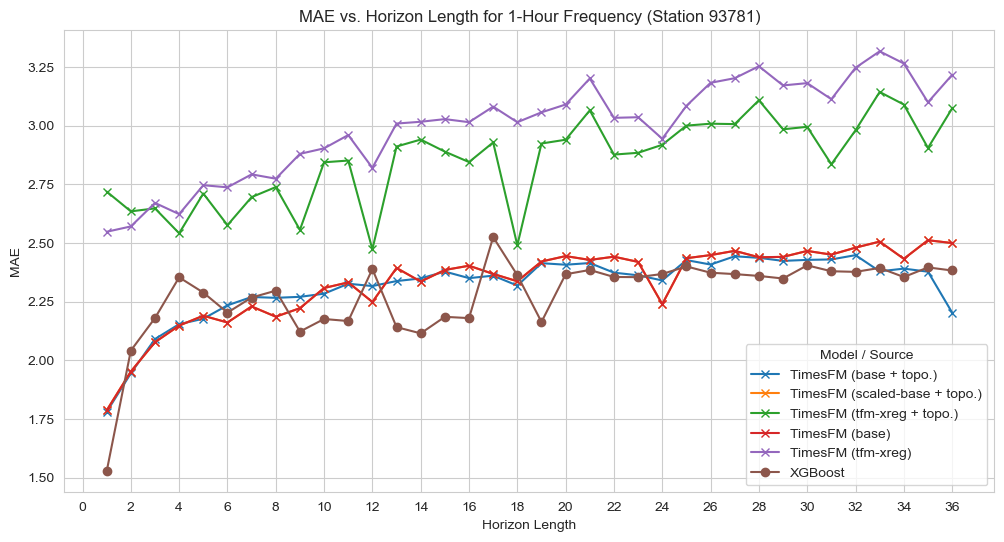

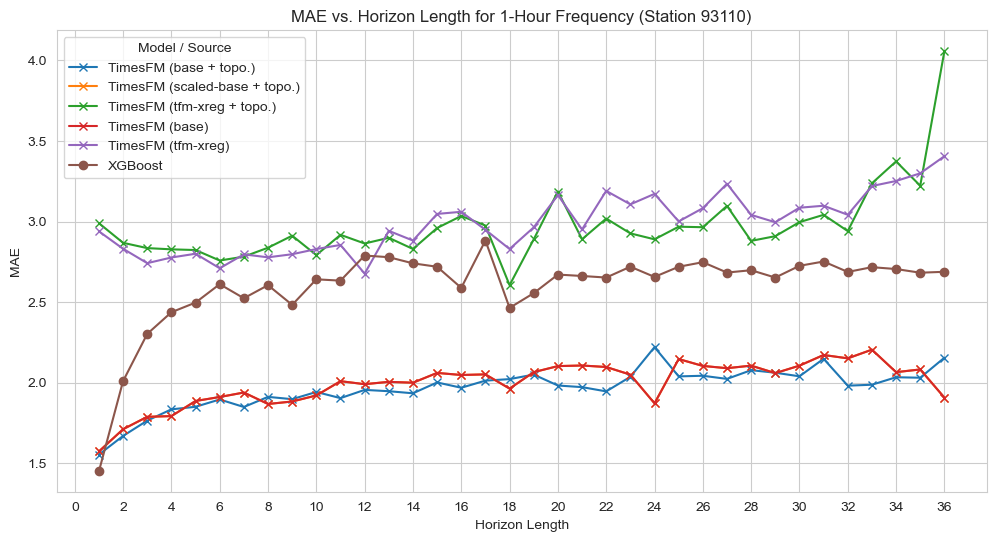

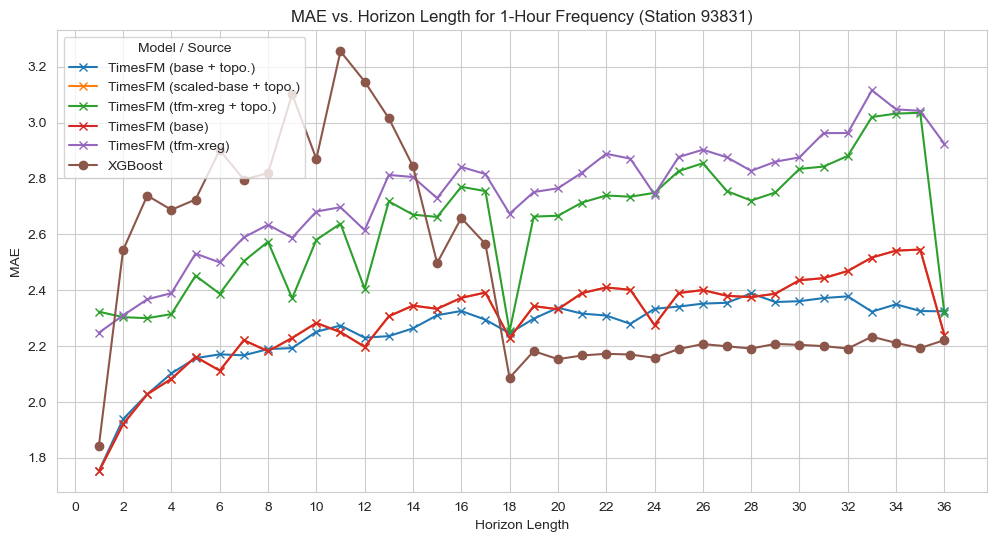

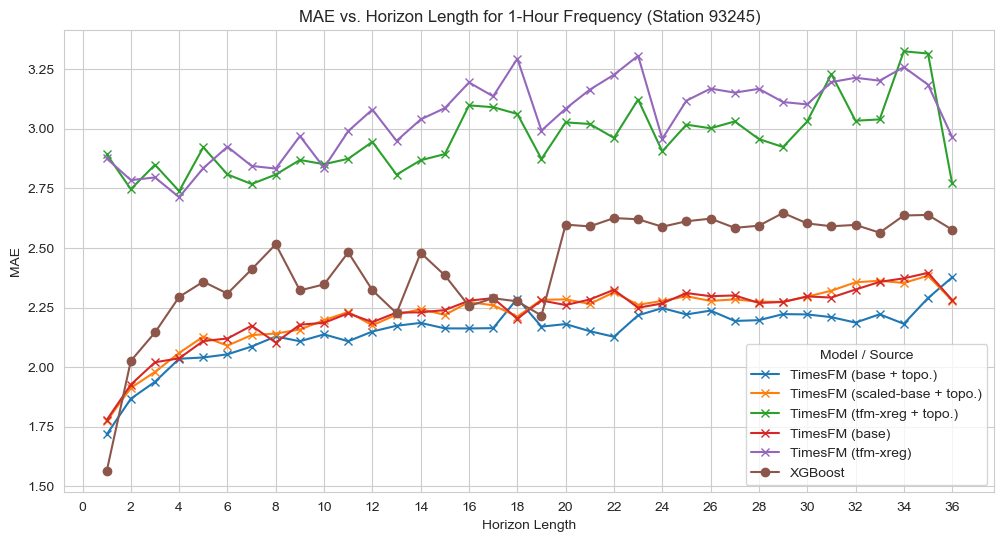

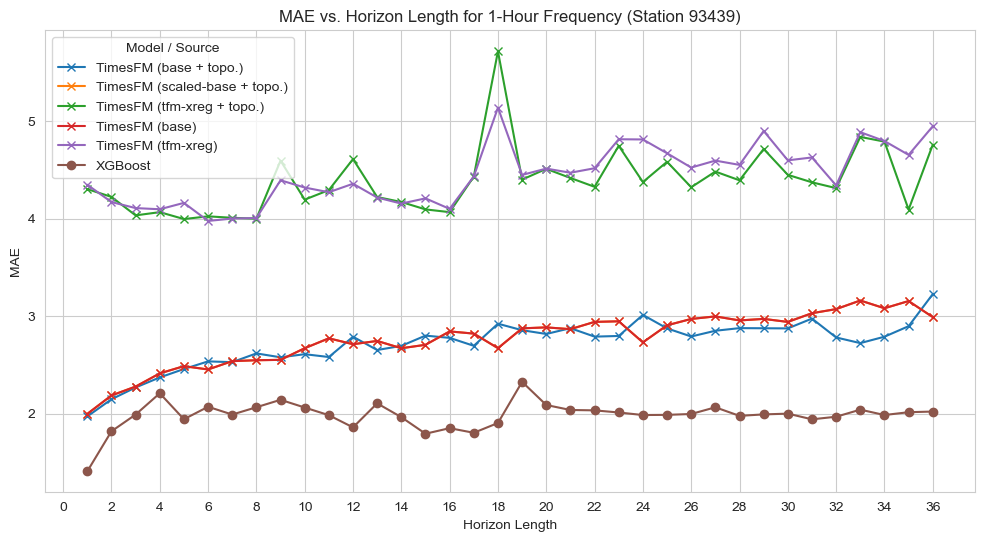

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the station IDs for comparison
station_ids = {93110, 93831, 93781, 93439, 93245}

# Define sources to exclude from TimesFM
sources_to_exclude = [ "scaled-base + topography", "tfm-xreg + topography", "scaled-base"]

# Loop through each station ID
for station_id in station_ids:
    plt.figure(figsize=(12, 6))

    # Prepare TimesFM data for plotting
    hour_tfm_station = hour_tfm[hour_tfm["Station ID"] == station_id].copy()

    # Exclude specific sources if specified
    if sources_to_exclude:
        hour_tfm_station = hour_tfm_station[~hour_tfm_station["Source"].isin(sources_to_exclude)]

    # Plot MAE values for each source in TimesFM for the current station
    for source in hour_tfm_station["Source"].unique():
        source_data = hour_tfm_station[hour_tfm_station["Source"] == source]

        # Plot MAE values for the source
        plt.plot(
            source_data["Horizon Length"],
            source_data["MAE"],
            label=f"TimesFM ({source})",
            marker="x"
        )

    # Prepare XGBoost data for plotting
    hour_xg_station = hour_xg[hour_xg["Station ID"] == station_id].copy()

    # Plot MAE values for XGBoost
    plt.plot(
        hour_xg_station["Output Chunk Length"],
        hour_xg_station["MAE"],
        label="XGBoost",
        marker="o"
    )
    
    # Customize the plot
    plt.title(f"MAE vs. Horizon Length for 1-Hour Frequency (Station {station_id})")
    plt.xlabel("Horizon Length")
    plt.ylabel("MAE")
    plt.legend(title="Model / Source")
    plt.grid(True)
    plt.xticks(ticks=np.arange(0, hour_tfm_station["Horizon Length"].max() + 1, 2))  # Adjust x-axis ticks dynamically
    plt.show()


# Plotting metrics for 3 hour data

## Violin plots to compare different methods in tfm and xg boost

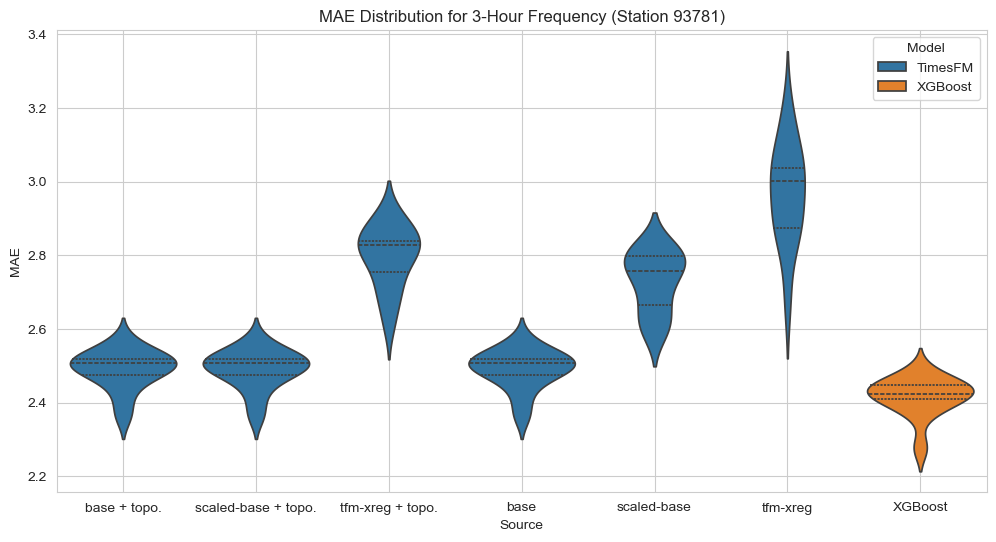

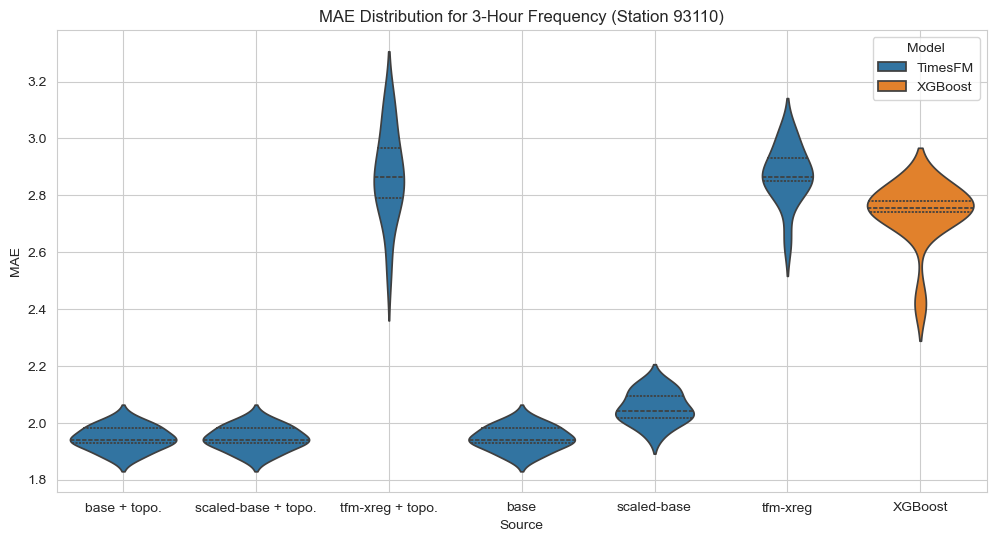

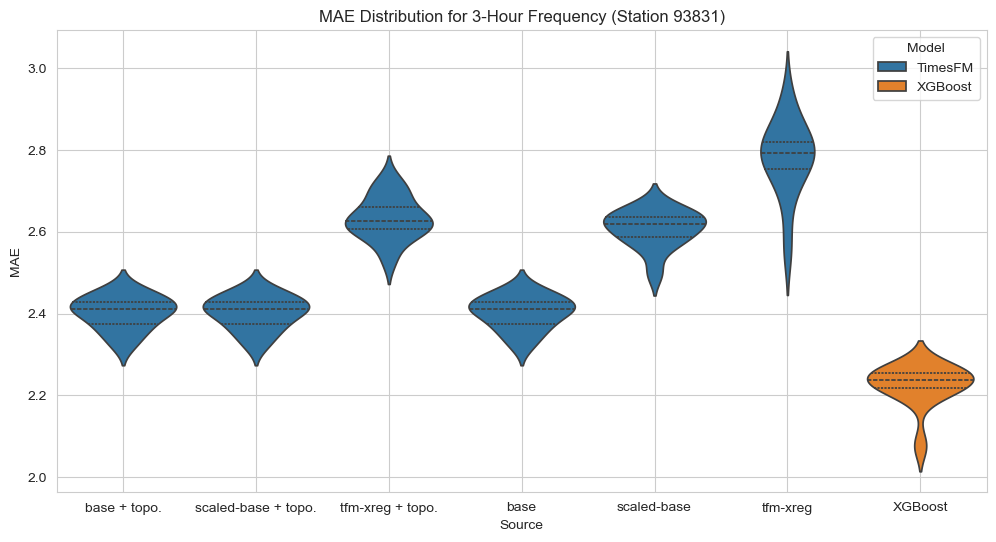

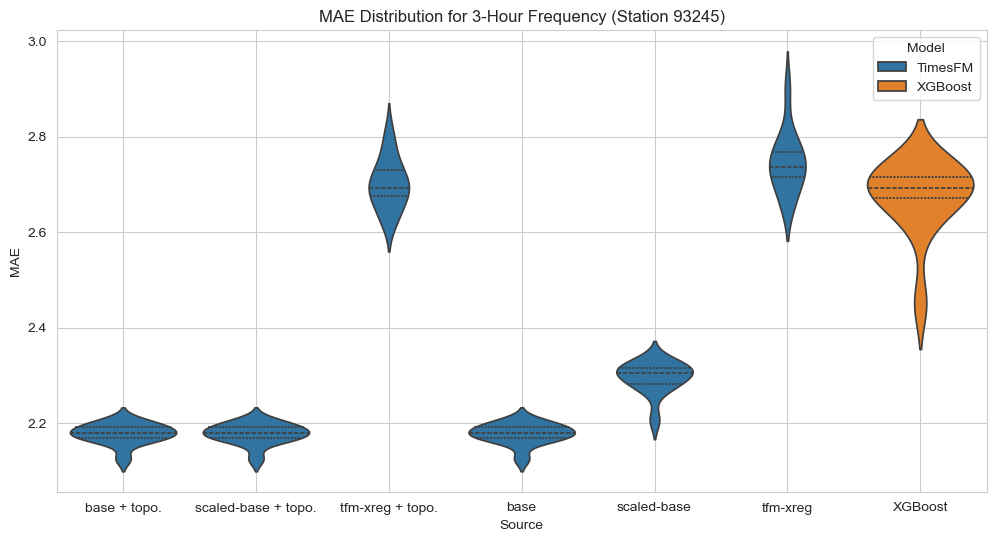

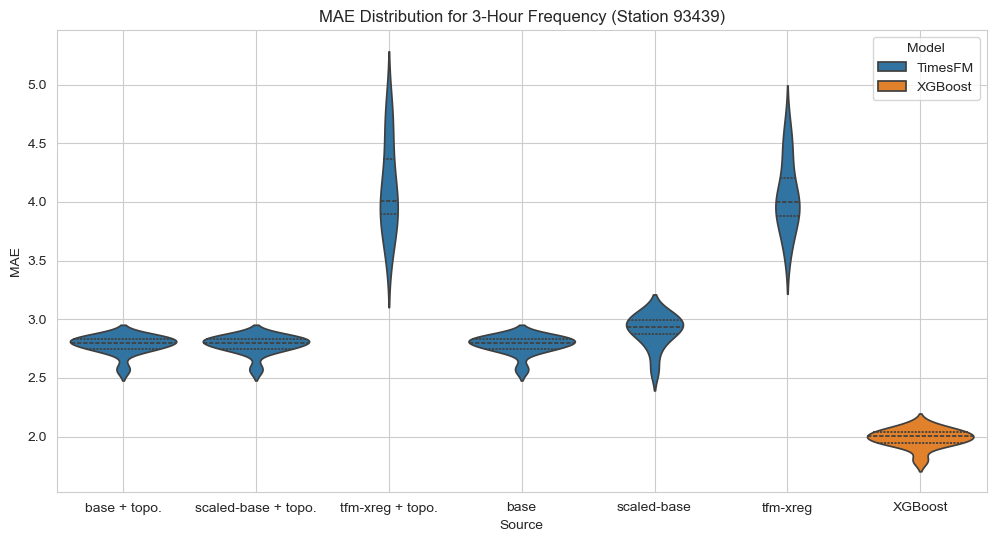

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# Define the station IDs for comparison
station_ids = {93110, 93831, 93781, 93439, 93245}

# Loop through each station ID
for station_id in station_ids:
    # Filter TimesFM data for the specific station
    three_hour_tfm_station = three_hour_tfm[three_hour_tfm["Station ID"] == station_id]
    three_hour_tfm_station = three_hour_tfm_station[["MAE", "Source"]]  # Only use the relevant columns
    three_hour_tfm_station["Model"] = "TimesFM"  # Add a model label for TimesFM

    # Prepare XGBoost data for the violin plot
    three_hour_xg_station = three_hour_xg[three_hour_xg["Station ID"] == station_id]
    three_hour_xg_station = three_hour_xg_station[["MAE"]].assign(Source="XGBoost", Model="XGBoost")

    # Combine TimesFM and XGBoost data
    combined_data = pd.concat([three_hour_tfm_station, three_hour_xg_station], ignore_index=True)

    # Create the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Source", y="MAE", hue="Model", data=combined_data, split=False, inner="quartile")

    # Customize the plot
    plt.title(f"MAE Distribution for 3-Hour Frequency (Station {station_id})")
    plt.xlabel("Source")
    plt.ylabel("MAE")
    plt.legend(title="Model")
    plt.grid(True)
    plt.show()


## Plot to compare mae vs output chunk length

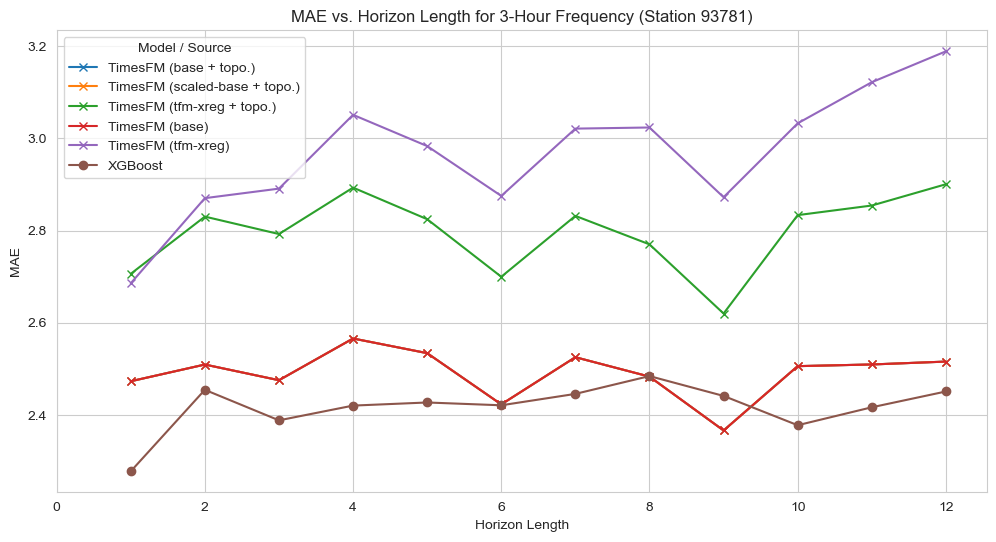

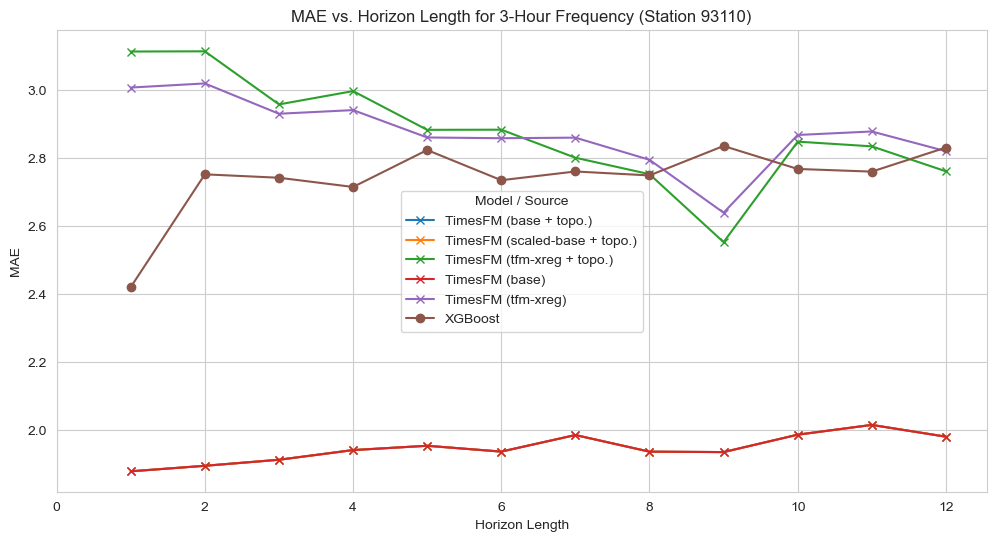

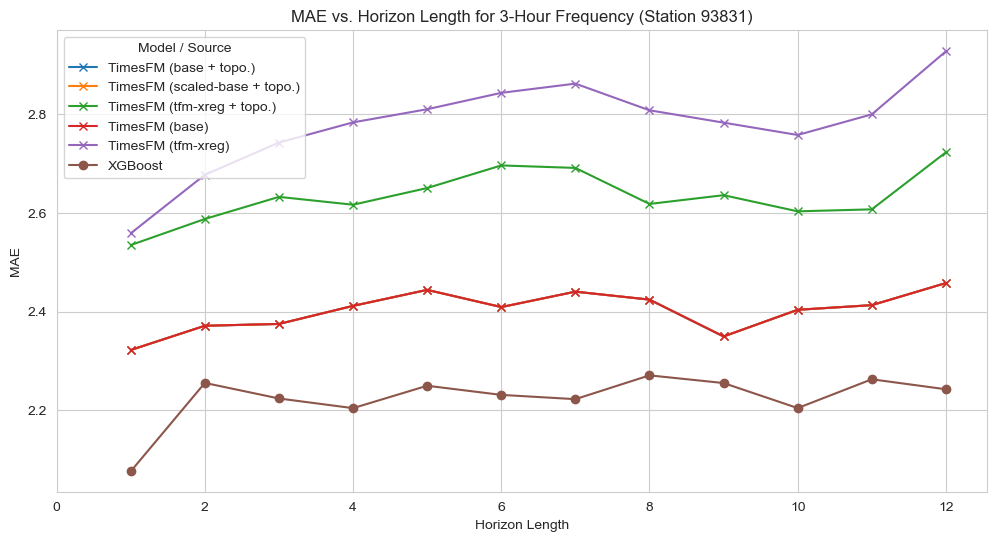

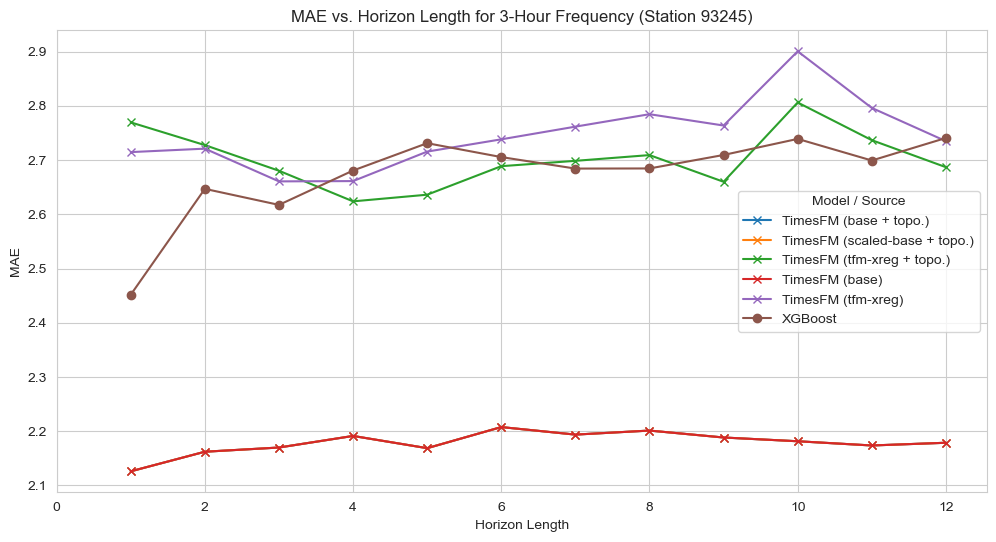

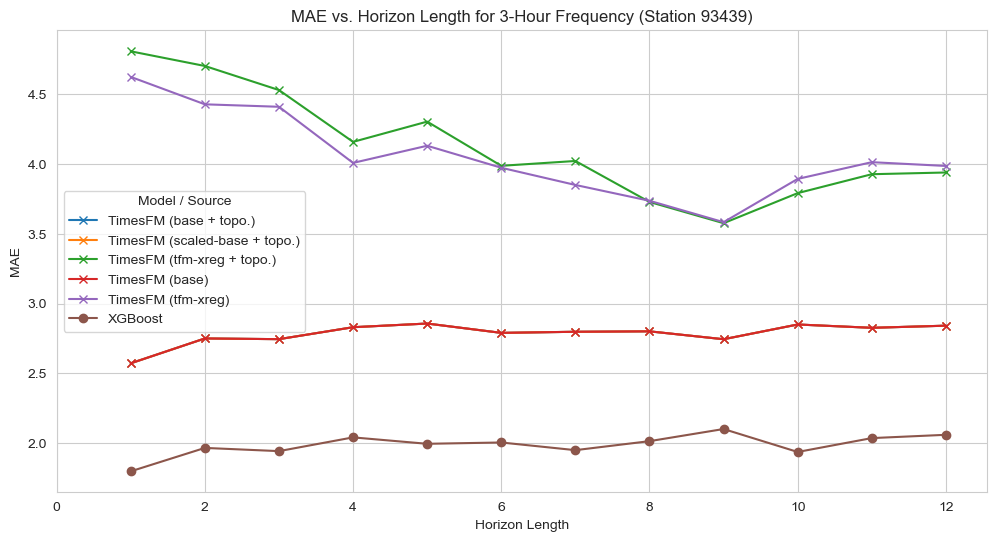

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the station IDs for comparison
station_ids = {93110, 93831, 93781, 93439, 93245}

# Define sources to exclude from TimesFM
sources_to_exclude = [ "scaled-base + topography", "tfm-xreg + topography", "scaled-base"]

# Loop through each station ID
for station_id in station_ids:
    plt.figure(figsize=(12, 6))

    # Prepare TimesFM data for plotting
    three_hour_tfm_station = three_hour_tfm[three_hour_tfm["Station ID"] == station_id].copy()

    # Exclude specific sources if specified
    if sources_to_exclude:
        three_hour_tfm_station = three_hour_tfm_station[~three_hour_tfm_station["Source"].isin(sources_to_exclude)]

    # Plot MAE values for each source in TimesFM for the current station
    for source in three_hour_tfm_station["Source"].unique():
        source_data = three_hour_tfm_station[three_hour_tfm_station["Source"] == source]

        # Plot MAE values for the source
        plt.plot(
            source_data["Horizon Length"],
            source_data["MAE"],
            label=f"TimesFM ({source})",
            marker="x"
        )

    # Prepare XGBoost data for plotting
    three_hour_xg_station = three_hour_xg[three_hour_xg["Station ID"] == station_id].copy()

    # Plot MAE values for XGBoost
    plt.plot(
        three_hour_xg_station["Output Chunk Length"],
        three_hour_xg_station["MAE"],
        label="XGBoost",
        marker="o"
    )
    
    # Customize the plot
    plt.title(f"MAE vs. Horizon Length for 3-Hour Frequency (Station {station_id})")
    plt.xlabel("Horizon Length")
    plt.ylabel("MAE")
    plt.legend(title="Model / Source")
    plt.grid(True)
    plt.xticks(ticks=np.arange(0, three_hour_tfm_station["Horizon Length"].max() + 1, 2))  # Adjust x-axis ticks dynamically
    plt.show()


# Plotting metrics for long horizon 10min data vs Hourly

## Violin plots comparing 10min long horizon with hourly

Hourly TimesFM Sources: ['base + topo.' 'scaled-base + topo.' 'tfm-xreg + topo.' 'base'
 'scaled-base' 'tfm-xreg']
Combined Data Sources: ['10-Min TimesFM' 'base + topo.' 'scaled-base + topo.' 'tfm-xreg + topo.'
 'base' 'scaled-base' 'tfm-xreg' 'Hourly XGBoost']


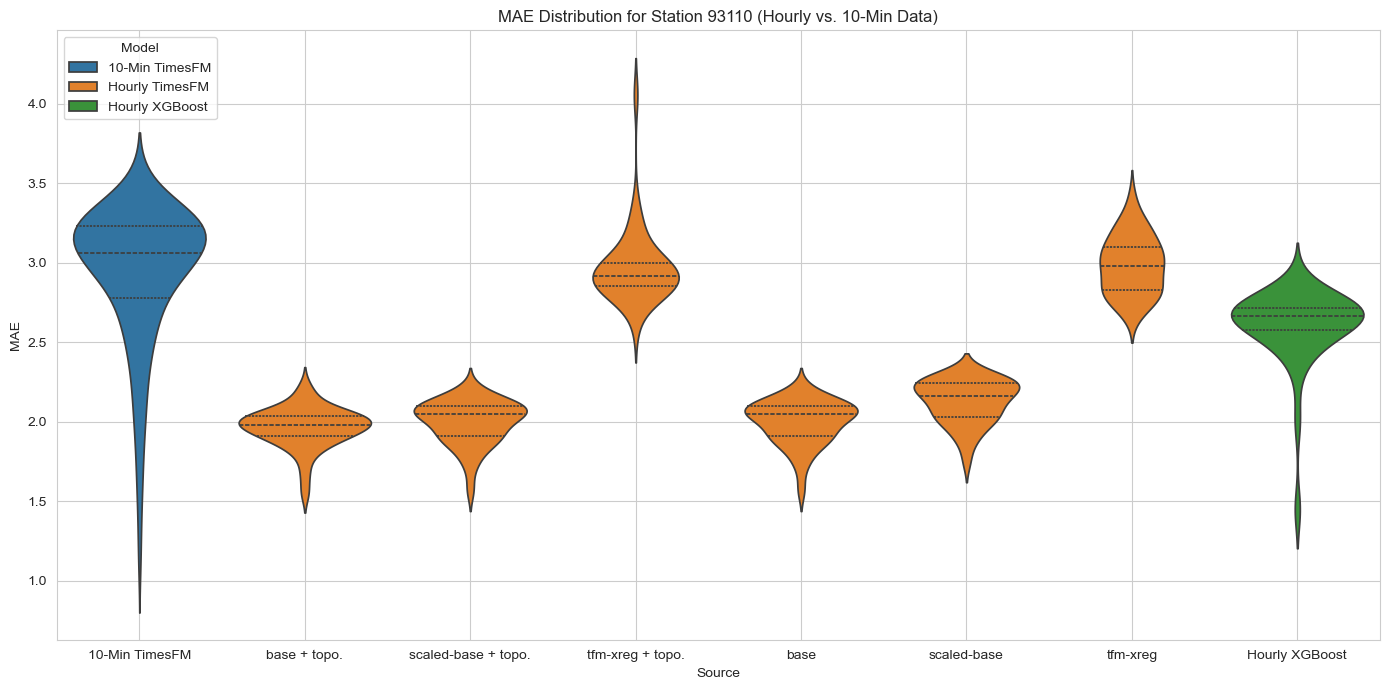

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the station ID for comparison
station_id = 93110

# Prepare 10-min TimesFM data for the station (resample to hourly frequency)
long_horizon_tfm_station = long_horizon_tfm[long_horizon_tfm["Station ID"] == station_id].copy()
long_horizon_tfm_station["Horizon Length (Hours)"] = long_horizon_tfm_station["Horizon Length"] / 6  # Convert to hours
long_horizon_tfm_station["Source"] = "10-Min TimesFM"
long_horizon_tfm_station["Model"] = "10-Min TimesFM"

# Prepare hourly TimesFM data for the station
hour_tfm_station = hour_tfm[hour_tfm["Station ID"] == station_id].copy()

# Debug: Check distinct sources
print("Hourly TimesFM Sources:", hour_tfm_station["Source"].unique())

# Ensure all sources are present in the data
hour_tfm_station["Model"] = "Hourly TimesFM"  # Add a model label for TimesFM

# Prepare hourly XGBoost data for the station
hour_xg_station = hour_xg[hour_xg["Station ID"] == station_id].copy()
hour_xg_station["Source"] = "Hourly XGBoost"
hour_xg_station["Model"] = "Hourly XGBoost"

# Combine all datasets
combined_data = pd.concat([
    long_horizon_tfm_station[["Horizon Length (Hours)", "MAE", "Source", "Model"]],
    hour_tfm_station[["Horizon Length", "MAE", "Source", "Model"]].rename(columns={"Horizon Length": "Horizon Length (Hours)"}),
    hour_xg_station[["Output Chunk Length", "MAE", "Source", "Model"]].rename(columns={"Output Chunk Length": "Horizon Length (Hours)"})
], ignore_index=True)

# Debug: Check combined data
print("Combined Data Sources:", combined_data["Source"].unique())

# Create the violin plot
plt.figure(figsize=(14, 7))
sns.violinplot(
    x="Source", 
    y="MAE", 
    hue="Model", 
    data=combined_data, 
    split=False, 
    inner="quartile"
)

# Customize the plot
plt.title(f"MAE Distribution for Station {station_id} (Hourly vs. 10-Min Data)")
plt.xlabel("Source")
plt.ylabel("MAE")
plt.legend(title="Model", loc="upper left")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Plot Comparing 10min long horizon with hourly

Combined Data Sources: ['10-Min TimesFM' 'base + topo.' 'scaled-base + topo.' 'tfm-xreg + topo.'
 'base' 'tfm-xreg' nan]


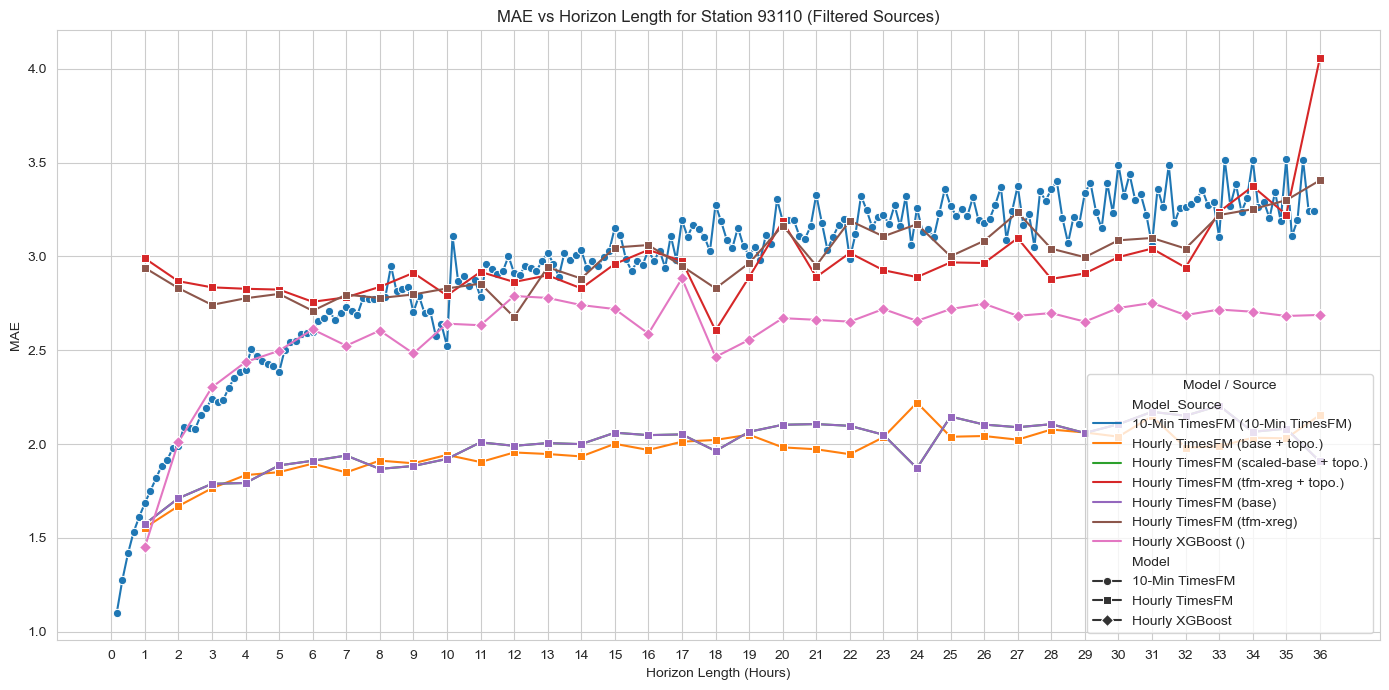

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the station ID for comparison
station_id = 93110

# Define sources to exclude
sources_to_exclude = ["scaled-base + topography", "tfm-xreg + topography", "scaled-base", "base + topography"]

# Prepare hourly TimesFM data for the station
hour_tfm_station = hour_tfm[hour_tfm["Station ID"] == station_id].copy()

# Exclude specific sources from hourly TimesFM
if sources_to_exclude:
    hour_tfm_station = hour_tfm_station[~hour_tfm_station["Source"].isin(sources_to_exclude)]

hour_tfm_station["Model"] = "Hourly TimesFM"  # Add a model label for TimesFM

# Prepare hourly XGBoost data for the station
hour_xg_station = hour_xg[hour_xg["Station ID"] == station_id].copy()
hour_xg_station["Model"] = "Hourly XGBoost"

# Combine all datasets
combined_data = pd.concat([
    long_horizon_tfm_station[["Horizon Length (Hours)", "MAE", "Source", "Model"]],
    hour_tfm_station[["Horizon Length", "MAE", "Source", "Model"]].rename(columns={"Horizon Length": "Horizon Length (Hours)"}),
    hour_xg_station[["Output Chunk Length", "MAE", "Model"]].rename(columns={"Output Chunk Length": "Horizon Length (Hours)"})
], ignore_index=True)

# Exclude specific sources from the combined dataset
if sources_to_exclude:
    combined_data = combined_data[~combined_data["Source"].isin(sources_to_exclude)]

# Combine Source and Model for the legend
combined_data["Model_Source"] = combined_data["Model"] + " (" + combined_data["Source"].fillna("") + ")"

# Debug: Check combined data
print("Combined Data Sources:", combined_data["Source"].unique())

# Create the line plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=combined_data,
    x="Horizon Length (Hours)",
    y="MAE",
    hue="Model_Source",  # Use combined Model_Source as the hue for legend distinction
    style="Model",  # Style by Model to differentiate between TimesFM and XGBoost
    markers=["o", "s", "D"],  # Use filled markers only
    dashes=False  # Solid lines for all models
)

# Customize the x-axis to make the grid hourly
plt.xticks(ticks=range(0, int(combined_data["Horizon Length (Hours)"].max()) + 1, 1))

# Customize the plot
plt.title(f"MAE vs Horizon Length for Station {station_id} (Filtered Sources)")
plt.xlabel("Horizon Length (Hours)")
plt.ylabel("MAE")
plt.legend(title="Model / Source", loc="lower right")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
